# Different visualizations for on Parking Tickets and Parking Meters

In [2]:
!pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/92/39/ef6f06a5b223dbea308cfcbb7a0f72e7b506aef1850e061b2c73b0818715/pyproj-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/fd/28/7bb5b1944d4002d4b2f967762018500381c3b532f98e456bbda40c3ded68/shapely-2.1.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ---------- ----------------------------- 81.9/323.6 kB 1.5 MB/s eta 0:00:01
   

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString
from shapely import wkt, affinity

pd.set_option('display.width', 175)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

path = "../data/cleaned_data"

## Import Data

Import our cleaned and transformed data

In [4]:
def df_to_gdf(df: pd.DataFrame, geometry_key: str = "Geometry") -> gpd.GeoDataFrame:
    df[geometry_key] = df[geometry_key].apply(wkt.loads)
    return gpd.GeoDataFrame(df, geometry=geometry_key)

## Meters Data

In [5]:
meters_df = pd.read_csv(f"{path}/parking_meters.csv")
meters_df = df_to_gdf(meters_df)
meters_df.head()

,METERHEAD,R_MF_9A_6P,R_MF_6P_10,R_SA_9A_6P,R_SA_6P_10,R_SU_9A_6P,R_SU_6P_10,RATE_MISC,TIMEINEFFE,T_MF_9A_6P,T_MF_6P_10,T_SA_9A_6P,T_SA_6P_10,T_SU_9A_6P,T_SU_6P_10,TIME_MISC,Geo Local Area,METERID,Geometry
0,Twin,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Mount Pleasant,990002,POINT (49.264 -123.1)
1,Pay Station,$4.00,$4.00,$4.00,$4.00,$4.00,$4.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Grandview-Woodland,6C1306,POINT (49.273 -123.069)
2,Pay Station,$2.00,$2.00,$2.00,$2.00,$2.00,$2.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Kensington-Cedar Cottage,6C2619,POINT (49.261 -123.07)
3,Pay Station,$1.00,$2.00,$1.00,$2.00,$1.00,$2.00,$ .50,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Grandview-Woodland,6C2016,POINT (49.266 -123.07)
4,Pay Station,$1.00,$2.00,$1.00,$2.00,$1.00,$2.00,NaN,METER IN EFFECT: 9:00 AM TO 10:00 PM,2 Hr,4 Hr,2 Hr,4 Hr,2 Hr,4 Hr,NaN,Kensington-Cedar Cottage,6C2711,POINT (49.26 -123.07)


In [6]:
tickets_df = pd.read_csv(f"{path}/parking_tickets.csv")
tickets_df = df_to_gdf(tickets_df)
tickets_df.head()

,Block,Street,EntryDate,Status,Year,BI_ID,hour,dayofweek,Geometry,Neighbourhood
0,800,RICHARDS ST,2023-07-11,VA,2023,4546401,0,1,POINT (49.284 -123.112),Downtown
1,300,E 8TH AVE,2023-07-11,IS,2023,4546402,0,1,POINT (49.263 -123.086),Mount Pleasant
2,500,E 19TH AVE,2023-07-11,IS,2023,4546406,0,1,POINT (49.253 -123.046),Renfrew-Collingwood
3,500,E 17TH AVE,2023-07-11,IS,2023,4546408,0,1,POINT (49.255 -123.082),Kensington-Cedar Cottage
4,100,E 20TH AVE,2023-07-11,IS,2023,4546409,0,1,POINT (49.253 -123.074),Kensington-Cedar Cottage


In [7]:
boundaries_df = pd.read_csv(f"{path}/local_area_boundaries.csv")
boundaries_df = df_to_gdf(boundaries_df)
boundaries_df.head(3)

,Neighbourhood,Geometry
0,Downtown,"POLYGON ((49.29 -123.112, 49.288 -123.104, 49.289 -123.099, 49.273 -123.1, 49.273 -123.102, 49.273 -123.111, 49.272 -123.114, 49.27 -123.121, 49.27 -123.129, 49.275 -123.138, 49.277 -123.132, 49.284 -123.121, 49.294 -123.137, 49.296 -123.135, 49.292 -123.123, 49.29 -123.112))"
1,Hastings-Sunrise,"POLYGON ((49.293 -123.056, 49.294 -123.052, 49.294 -123.047, 49.293 -123.037, 49.294 -123.023, 49.293 -123.023, 49.266 -123.024, 49.265 -123.024, 49.265 -123.025, 49.265 -123.025, 49.265 -123.026, 49.265 -123.026, 49.264 -123.027, 49.264 -123.027, 49.264 -123.028, 49.264 -123.028, 49.263 -123.03, 49.263 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.03, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.031, 49.262 -123.032, 49.262 -123.032, 49.262 -123.032, 49.262 -123.032, 49.262 -123.033, 49.262 -123.044, 49.262 -123.044, 49.262 -123.057, 49.262 -123.057, 49.293 -123.056))"
2,Kerrisdale,"POLYGON ((49.216 -123.179, 49.215 -123.176, 49.215 -123.172, 49.215 -123.172, 49.215 -123.171, 49.215 -123.17, 49.215 -123.17, 49.215 -123.169, 49.215 -123.169, 49.215 -123.168, 49.214 -123.168, 49.214 -123.167, 49.214 -123.167, 49.214 -123.166, 49.214 -123.165, 49.213 -123.165, 49.213 -123.164, 49.213 -123.164, 49.213 -123.163, 49.213 -123.163, 49.213 -123.162, 49.212 -123.162, 49.212 -123.161, 49.212 -123.161, 49.212 -123.16, 49.212 -123.16, 49.211 -123.159, 49.211 -123.159, 49.211 -123.159, 49.211 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.158, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.21 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.157, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.156, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.209 -123.155, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.153, 49.207 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.206 -123.152, 49.205 -123.152, 49.205 -123.152, 49.205 -123.152, 49.205 -123.151, 49.205 -123.151, 49.205 -123.15, 49.209 -123.149, 49.209 -123.148, 49.209 -123.149, 49.219 -123.148, 49.219 -123.14, 49.234 -123.14, 49.235 -123.155, 49.235 -123.17, 49.235 -123.179, 49.216 -123.179))"


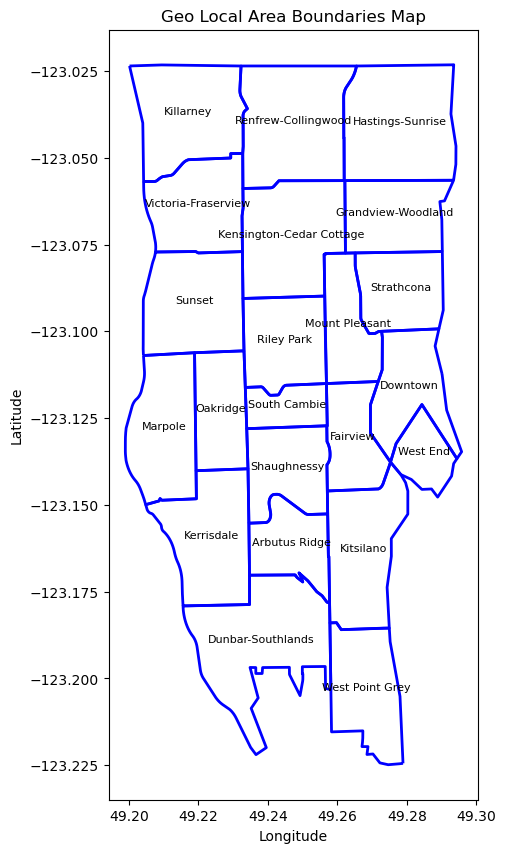

In [25]:
exterior_boundaries = boundaries_df.copy()
exterior_boundaries["Geometry"] = exterior_boundaries["Geometry"].apply(
    lambda geom: LineString(geom.exterior)
)

# Step 2: Plot the outlines
fig, ax = plt.subplots(figsize=(10, 10))
exterior_boundaries.plot(ax=ax, color='blue', linewidth=2)

for idx, row in boundaries_df.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='black'
        )

ax.set_title("Geo Local Area Boundaries Map")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

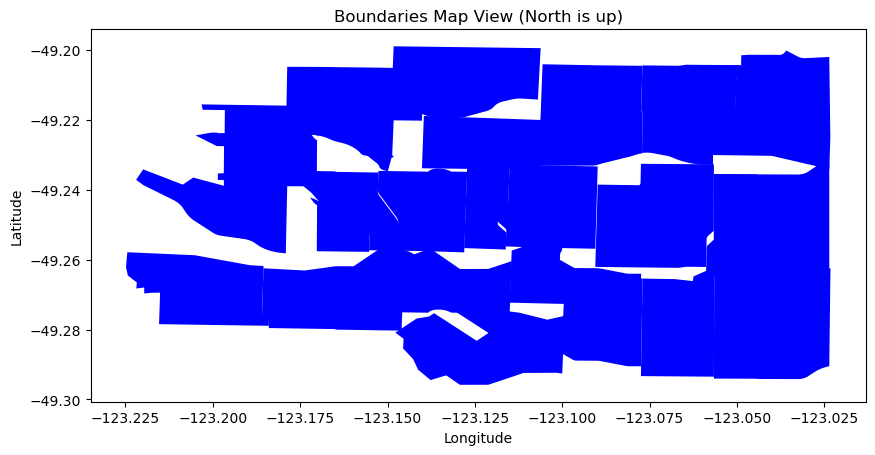

In [9]:
# Step 1: Apply geometric transformation to reflect over Y and rotate 90° right
transformed_boundaries = boundaries_df.copy()
transformed_boundaries["Geometry"] = transformed_boundaries["Geometry"].apply(
    lambda geom: affinity.rotate(affinity.scale(geom, xfact=-1, yfact=1), -90, origin=(0, 0))
)

# Step 2: Plot
fig, ax = plt.subplots(figsize=(10, 10))
transformed_boundaries.plot(ax=ax, color='blue', linewidth=2)

ax.set_title("Boundaries Map View (North is up)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Visualization of Boundaries and Parking Meter Locations

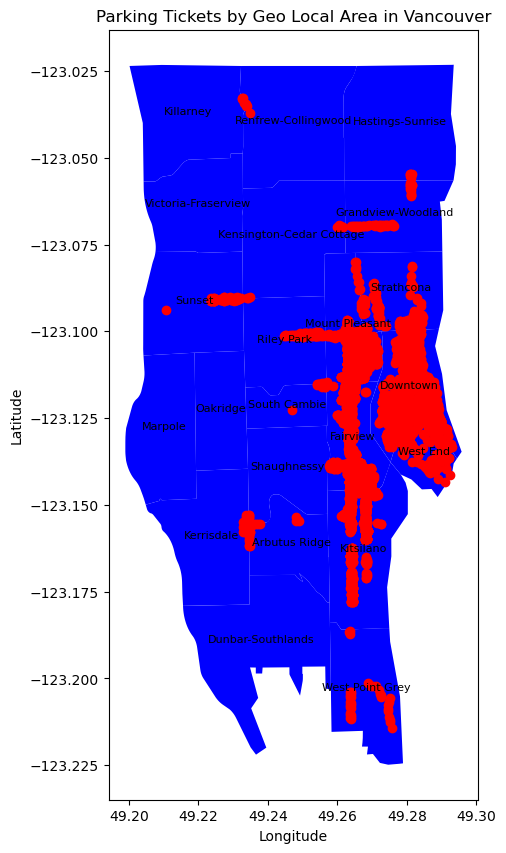

In [26]:

fig, ax = plt.subplots(figsize=(10, 10))

boundaries_df.plot(ax=ax, color='blue', linewidth=2)
meters_df.plot(ax=ax, color='red', linewidth=1)

for idx, row in boundaries_df.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='black'
        )

ax.set_title("Parking Tickets by Geo Local Area in Vancouver")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Visualization of Boundaries and Parking Ticket Locations

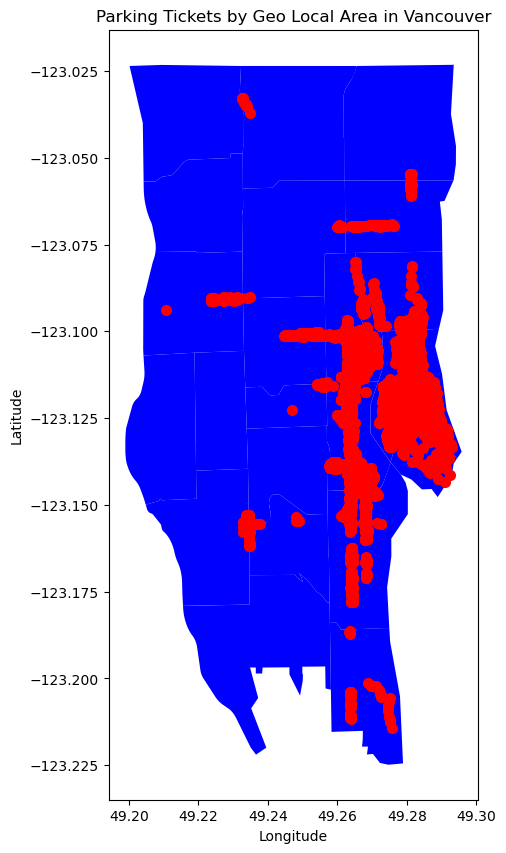

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))

boundaries_df.plot(ax=ax, color='blue', linewidth=2)
meters_df.plot(ax=ax, color='red', linewidth=2)

ax.set_title("Parking Tickets by Geo Local Area in Vancouver")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# General Frequency Visualizations

* Amount of tickets per neighbourhood
* Tickets per street 


## Tickets Per Neighbourhood

In [12]:
grouped_tickets_df = tickets_df.groupby("Neighbourhood").size().reset_index(name="TicketCount")

In [13]:
# largest_neighbourhood with tickets
grouped_tickets_df.sort_values("TicketCount", ascending=False).iloc[0]

Neighbourhood    Downtown
TicketCount         11556
Name: 1, dtype: object

In [15]:
neighbourhoods_df = boundaries_df.merge(grouped_tickets_df, left_on="Neighbourhood", right_on="Neighbourhood", how="outer")
neighbourhoods_df["TicketCount"] = neighbourhoods_df["TicketCount"].fillna(0)

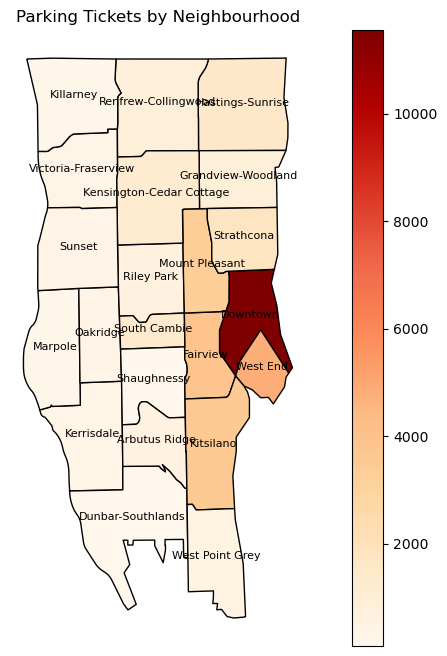

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
neighbourhoods_df.plot(column="TicketCount", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
for idx, row in boundaries_df.iterrows():
    if not row['Geometry'].is_empty:
        centroid = row['Geometry'].centroid
        ax.annotate(
            row['Neighbourhood'],
            xy=(centroid.x, centroid.y),
            fontsize=8,
            ha='center',
            color='black'
        )
ax.set_title("Parking Tickets by Neighbourhood")
ax.axis('off')
plt.show()

## Tickets Per Street

In [18]:
grouped_tickets_df = tickets_df.groupby("Street").size().reset_index(name="TicketCount")

In [21]:
streets_df = boundaries_df.merge(grouped_tickets_df, left_on="Street", right_on="Street", how="outer")
streets_df["TicketCount"] = streets_df["TicketCount"].fillna(0)

KeyError: 'Street'

In [23]:
print("Boundaries columns:", boundaries_df.columns)
print("Grouped tickets columns:", grouped_tickets_df.columns)

Boundaries columns: Index(['Neighbourhood', 'Geometry'], dtype='object')
Grouped tickets columns: Index(['Street', 'TicketCount'], dtype='object')


NameError: name 'streets_df' is not defined

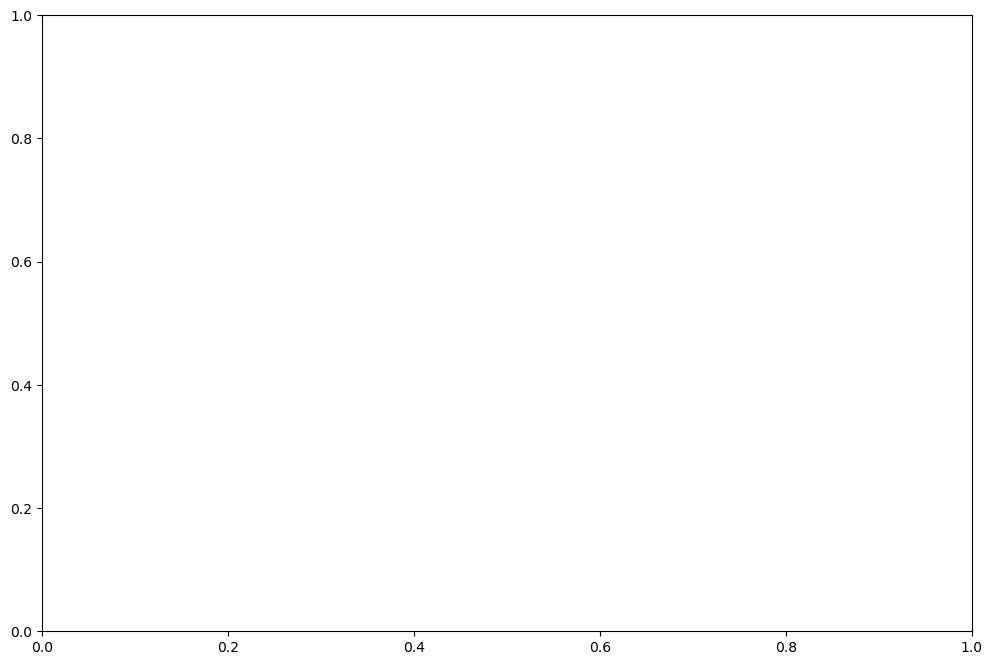

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
streets_df.plot(column="ticket_count", cmap="OrRd", legend=True, ax=ax, edgecolor="black")
ax.set_title("Parking Tickets by Street")
ax.axis('off')
plt.show()

# Visualization of X Neighbourhood
* tickets per hour
* tickets per day
* tickets per street in the neighbourhood